In [1]:
import numpy as np
import os
%load_ext autoreload
%autoreload 2
from PIL import Image 
from IPython.display import clear_output
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt
import PIL
import torch
import pandas as pd
%matplotlib inline

### Add path to project 

In [2]:
import sys
sys.path
sys.path.append('/code/Deep-Vectorization-of-Technical-Drawings/')

In [3]:
from util_files.rendering.cairo  import render,render_with_skeleton
from util_files.data.graphics_primitives import PT_LINE,  PT_CBEZIER, PT_QBEZIER

In [4]:
# Lets make for example 3 random quadratic bezier and 2 lines from interval (0,1)

In [5]:
curves  = np.random.rand(3,6)
curve_width = np.random.rand(3)*7 # (to make width from 0 to 7 pixel )

lines  = np.random.rand(3,4)
lines_width = np.random.rand(3)*7 # (to make width from 0 to 7 pixel )

In [6]:
# define canvas dimensions

In [7]:
dimensions = 128

In [8]:
# make your coordinates from (0,1) to bounded by canvas size 

In [9]:
curves = curves *dimensions
lines  = lines *dimensions

In [10]:
#concatenate curves parameter and curve with(curve with as last paraqmeter)

In [11]:
np.concatenate((curves, curve_width[...,None]),axis=1).shape

(3, 7)

In [12]:
# Define dictionary with ptimitives (PT_LINE, PT_QBEZIER)

In [13]:
a ={PT_QBEZIER:np.concatenate((curves , curve_width[...,None]),axis=1),PT_LINE:np.concatenate((lines, lines_width[...,None]),axis=1)}

In [14]:
# To render image call render or render_with_skeleton function from util_files.rendering.cairo 


In [15]:
rendered_image = render(a,(dimensions,dimensions), data_representation='vahe',linecaps='round')
#For primitives format (number_priimtives,primitive_params), data_representation should be vahe.
#You could alsoo render if format

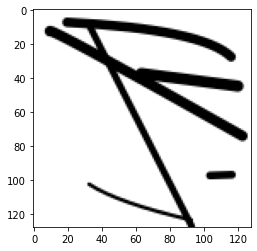

In [16]:
plt.imshow(rendered_image,'gray')

In [17]:
print(curves, curve_width)

[[123.01136544  74.5437417    7.06895402   9.15565792   9.9303255
   13.10963039]
 [ 32.95561325 102.88623205  49.84756437 113.90026452  92.90383352
  123.88636104]
 [116.3178965   28.07706994  99.4028496   11.89533935  20.03178741
    7.81802404]] [6.08188905 2.17225351 5.59328349]


In [18]:
print(lines, lines_width)

[[ 32.47418791   8.49104389  93.21203732 127.65948517]
 [116.84418655  97.30723457 103.92784001  97.76227435]
 [120.2988547   45.27638051  63.61621008  37.87318269]] [3.95981852 4.5318874  6.63791494]
